# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [1]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [2]:
wnba = pd.read_csv('../data/wnba_clean.csv', index_col = 0)
wnba

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [3]:
"""The WNBA sample should be a representative sample of the population of all the female prof. bask. players in the
world. 
The WBNA sample should have more than approx. 30 obs. Like this, we can use the CLT and infer the mean weight"""


'The WNBA sample should be a representative sample of the population of all the female prof. bask. players in the\nworld. \nThe WBNA sample should have more than approx. 30 obs. Like this, we can use the CLT and infer the mean weight'

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [14]:
conf_int = stats.t.interval(0.95 , len(wnba)-1, wnba['Weight'].mean() , stats.sem(wnba['Weight']))
conf_int

(77.15461406720749, 80.80313241166576)

**What can you say about these results?**

In [5]:
"""With a 95% level of confidence we can state that the mean of the Weight in the general population of 
female basketball players in the world is between 77.15 and 80.80 kg"""

'With a 95% level of confidence we can state that the mean of the Weight in the general population of \nfemale basketball players in the world is between 77.15 and 80.80 kg'

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [6]:
"""With at least a 95% level of confidence her assumption is correct."""

'With at least a 95% level of confidence her assumption is correct.'

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

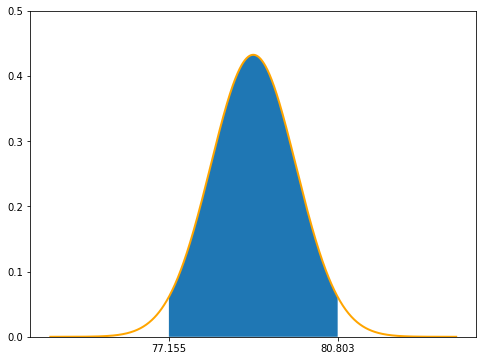

In [61]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

mu = wnba['Weight'].mean()
s = wnba['Weight'].std() / np.sqrt(len(wnba))
weight_dist_1 = stats.norm(mu, s)

x1 = np.linspace(weight_dist_1.ppf(0.000001), weight_dist_1.ppf(0.999999), 1000)
y1 = weight_dist_1.pdf(x1)

x_fill = np.linspace(conf_int[0],conf_int[1] , 1000)
y_fill = weight_dist_1.pdf(x_fill)

plt.ylim(0, .5)
plt.xticks(conf_int)
plt.plot(x1,y1, lw= 2, color = 'orange')
plt.fill_between(x_fill, y_fill)
plt.show()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [ ]:
# Requirements are the same as above, but in this case will use a Z test because we are estimating a proportion.

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [77]:
from statsmodels.stats.proportion import proportion_confint

conf_int=proportion_confint(len(wnba[wnba['FT%']<60]), len(wnba) , alpha=0.05, method='normal')
conf_int

(0.04955898831729733, 0.14762411027425196)

**What can you comment about our result? What would you tell your sister?**

In [63]:
"""The proportion of players that fail more than 40% of the free throws is between 4.9% and 14.7% with a cnfidence
level of 95%. Thus, my sister is wrong - the number of players that miss their free throws is well below 50%."""

'The proportion of players that fail more than 40% of the free throws is between 4.9% and 14.7% with a cnfidence\nlevel of 95%. Thus, my sister is wrong - the number of players that miss their free throws is well below 50%.'

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

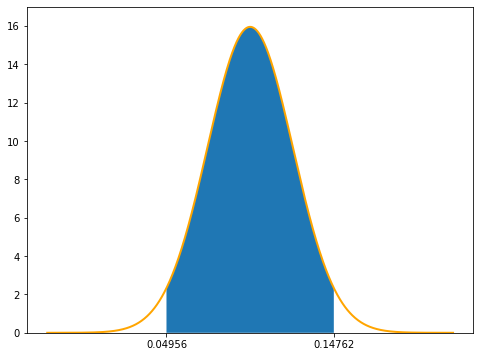

In [79]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

m =  len(wnba[wnba['FT%']<60]) / len(wnba)
s = np.sqrt(m*(1-m)/len(wnba))

FT_dist = stats.norm(m,s) 

x = np.linspace(FT_dist.ppf(0.000001), FT_dist.ppf(0.999999), 1000)
y = FT_dist.pdf(x)

x_fill = np.linspace(conf_int[0],conf_int[1] , 1000)
y_fill = FT_dist.pdf(x_fill)

plt.ylim(0, 17)
plt.xticks(conf_int)
plt.plot(x,y, lw= 2, color = 'orange')
plt.fill_between(x_fill, y_fill)
plt.show()

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [ ]:
# same same here...

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [98]:
stats.ttest_1samp(wnba['AST'], 52)

Ttest_1sampResult(statistic=-2.1499947192482898, pvalue=0.033261541354107166)

In [ ]:
# We can reject the Null H., so the average assists for female prof. players is sig. different from 52.

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [87]:
stat = stats.ttest_1samp(wnba['AST'], 52)[0]
p_onesided = stats.ttest_1samp(wnba['AST'], 52)[1]/2

print (stat, p_onesided)

"""Since ponesided < 0.05 and stat < 0 then we can reject the Null H. and accept the alternative H. that 
the average assists for female professional players is LOWER than the average of both female and male players
combined, i.e., my brother is wrong"""

-2.1499947192482898 0.016630770677053583


'Since ponesided < 0.05 and stat < 0 then we can reject the Null H. and accept the alternative H. that \nthe average assists for female professional players is LOWER than the average of both female and male players\ncombined, i.e., my brother is wrong'

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

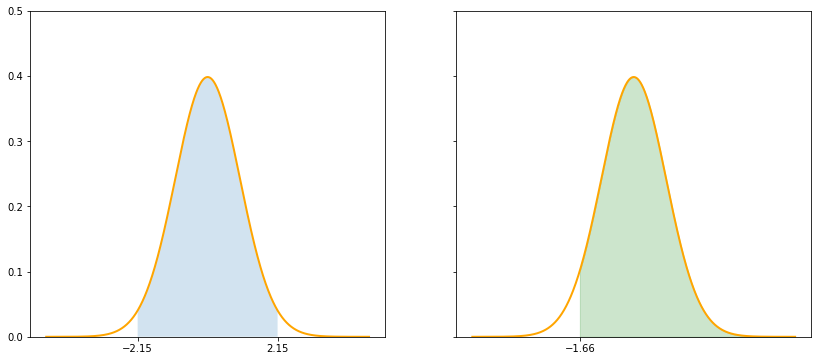

In [113]:
fig, axs = plt.subplots(1,2, sharey = True, figsize = (14,6))

m = wnba.AST.mean()
s = wnba.AST.std()/np.sqrt(len(wnba))

AST_dist = stats.t(len(wnba)-1)

x = np.linspace(AST_dist.ppf(0.000001), AST_dist.ppf(0.999999), 1000)
y = AST_dist.pdf(x)

x_fill = np.linspace(stat,-stat , 1000)
y_fill = AST_dist.pdf(x_fill)

x_fill2 = np.linspace(AST_dist.ppf(0.05),AST_dist.ppf(0.999999), 1000)
y_fill2 = AST_dist.pdf(x_fill2)

plt.ylim(0, 0.5)

axs[0].plot(x,y, lw= 2, color = 'orange')
axs[0].fill_between(x_fill, y_fill, alpha = 0.2)
axs[0].set_xticks([stat,-stat])

axs[1].plot(x,y, lw= 2, color = 'orange')
axs[1].fill_between(x_fill2, y_fill2, color = 'green', alpha = 0.2)
axs[1].set_xticks([AST_dist.ppf(0.05)])

plt.show()

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [ ]:
# Using statistical tests available in scipy. Assumption is that the sample 
# is representative of the whole population

In [ ]:
from scipy.stats import normaltest, shapiro

print(normaltest(wnba.Weight))
# DAgostino test Null Hip - Sample comes from Normal Dist is not rejected with a 95% conf. level

print(shapiro(wnba.Weight))
# Shapiro test Null Hip - Sample comes from Normal Dist is rejected with a 95% conf. level not rejected with 
# 98% conf level for instance

**What are your comments in regards to the results of the test?**

In [ ]:
# Depending on the test and conf interval used, different conclusions might be reached. Related also to the
# approximation to normal for the sample data !? 